## Research Qestion Q3
How has Netflix’s movie acquisition strategy evolved in terms of budget and revenue scale over time?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

movies_path = "../data/raw/netflix_movies_detailed_up_to_2025.csv"
movies_df = pd.read_csv(movies_path)

movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [27]:
movies_df["date_added"] = pd.to_datetime(movies_df["date_added"], errors="coerce")

# Create year-month column (YYYY-MM)
movies_df["year_month"] = movies_df["date_added"].dt.to_period("M")

In [3]:
# Filter movie data only
movies_only = movies_df[movies_df["type"] == "Movie"].copy()

movies_only.shape

(16000, 19)

In [4]:
# Select relevant columns for Q3 analysis
movies_q3 = movies_only[
    ["title", "year_month", "release_year", "budget", "revenue"]
].copy()

movies_q3.head()

,title,year_month,release_year,budget,revenue
0,Shrek Forever After,2010-05,2010,165000000,752600867
1,Inception,2010-07,2010,160000000,839030630
2,Harry Potter and the Deathly Hallows: Part 1,2010-11,2010,250000000,954305868
3,Tangled,2010-11,2010,260000000,592461732
4,How to Train Your Dragon,2010-03,2010,165000000,494879471


In [5]:
# Remove rows with missing budget or revenue
movies_q3_clean = movies_q3.dropna(subset=["budget", "revenue"])

movies_q3_clean.shape

(16000, 5)

Although the dataset provides release_year, this analysis focuses on the year derived from date_added to capture Netflix’s acquisition timing. This allows the analysis to reflect Netflix’s strategic selection of movies by budget and revenue scale at each point in time, rather than broader industry-wide production trends.

In [6]:
# Convert date_added to datetime
movies_df["date_added"] = pd.to_datetime(movies_df["date_added"], errors="coerce")

# Extract year from date_added
movies_df["year"] = movies_df["date_added"].dt.year

# Check result
movies_df[["date_added", "year"]].head()

,date_added,year
0,2010-05-16,2010
1,2010-07-15,2010
2,2010-11-17,2010
3,2010-11-24,2010
4,2010-03-18,2010


### Budget

In [7]:
movies_df[["year", "budget", "revenue"]].head() 

movies_financial_df = movies_df[
    (movies_df["budget"] > 0) & (movies_df["revenue"] > 0)
]

yearly_financial_stats = (
    movies_financial_df
    .groupby("year")
    .agg(
        median_budget=("budget", "median"),
        mean_budget=("budget", "mean"),
        median_revenue=("revenue", "median"),
        mean_revenue=("revenue", "mean"),
        count_movies=("budget", "count")
    )
    .reset_index()
)

yearly_financial_stats.head()

,year,median_budget,mean_budget,median_revenue,mean_revenue,count_movies
0,2010,15000000.0,3.279325e+07,20078723.5,8.425910e+07,288
1,2011,17000000.0,3.153516e+07,27000000.0,8.793272e+07,293
2,2012,14000000.0,3.369245e+07,24908246.0,1.011111e+08,264
3,2013,15000000.0,3.281687e+07,24333328.0,9.629985e+07,286
4,2014,14000000.0,3.216236e+07,28595105.0,1.036421e+08,271


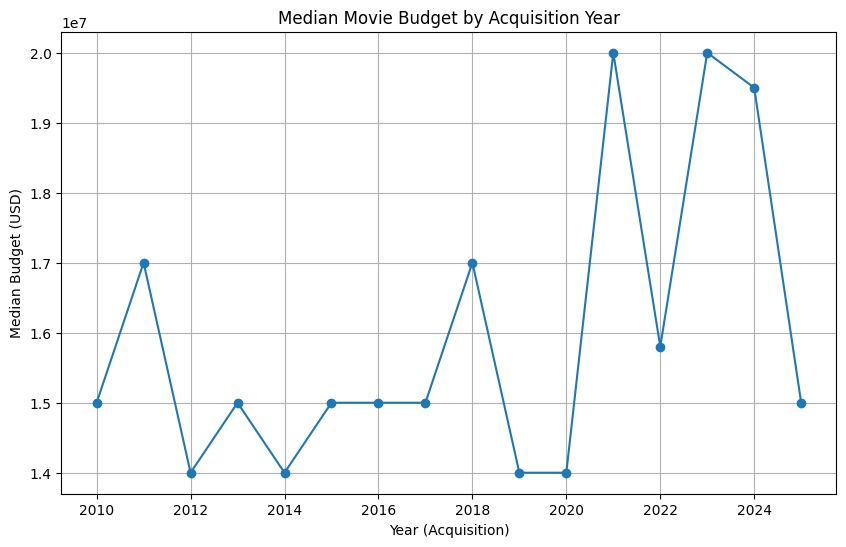

In [8]:
# Median Budget Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(
    yearly_financial_stats["year"],
    yearly_financial_stats["median_budget"],
    marker="o"
)

plt.title("Median Movie Budget by Acquisition Year")
plt.xlabel("Year (Acquisition)")
plt.ylabel("Median Budget (USD)")
plt.grid(True)

plt.show()

In [20]:
# Graph 1.1 Median Budget by Month
# Compute median budget and number of movies per month
monthly_budget_stats = (
    movies_df.loc[movies_df["budget"] > 0]
    .groupby("year_month")
    .agg(median_budget=("budget", "median"), n_movies=("budget", "size"))
    .reset_index()
)

# Keep months with enough samples (e.g., at least 10 movies)
monthly_budget_stats = monthly_budget_stats.loc[monthly_budget_stats["n_movies"] >= 10]

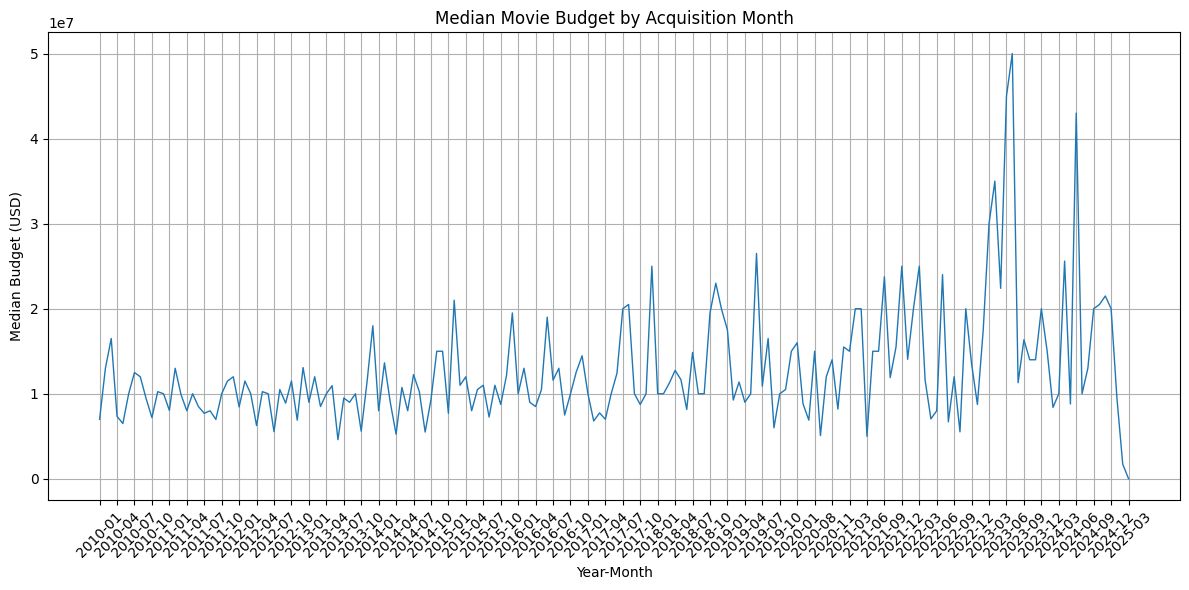

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

x = monthly_budget_stats["year_month"].astype(str)
y = monthly_budget_stats["median_budget"]

plt.plot(x, y, linewidth=1)

plt.title("Median Movie Budget by Acquisition Month")
plt.xlabel("Year-Month")
plt.ylabel("Median Budget (USD)")

# Show x-axis labels every 3 months
plt.xticks(
    ticks=range(0, len(x), 3),
    labels=x[::3],
    rotation=45
)

plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Compute median movie budget by acquisition quarter
quarterly_budget_stats = (
    movies_df.loc[movies_df["budget"] > 0]
    .groupby(movies_df["date_added"].dt.to_period("Q"))
    .agg(
        median_budget=("budget", "median"),
        n_movies=("budget", "size")
    )
    .reset_index()
)

# Convert Period to string for plotting
quarterly_budget_stats["year_quarter"] = quarterly_budget_stats["date_added"].astype(str)

# Keep quarters with sufficient samples
quarterly_budget_stats = quarterly_budget_stats.loc[
    quarterly_budget_stats["n_movies"] >= 10
]

quarterly_budget_stats.head()

,date_added,median_budget,n_movies,year_quarter
0,2010Q1,13000000.0,94,2010Q1
1,2010Q2,8000000.0,91,2010Q2
2,2010Q3,10000000.0,106,2010Q3
3,2010Q4,9250000.0,112,2010Q4
4,2011Q1,10600000.0,93,2011Q1


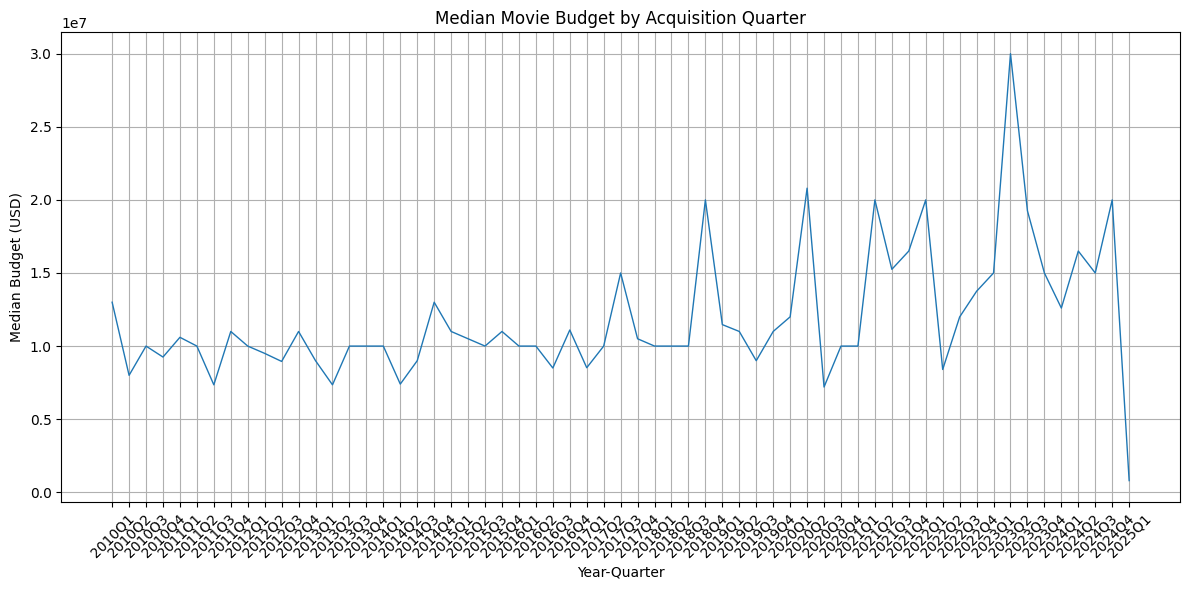

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(
    quarterly_budget_stats["year_quarter"],
    quarterly_budget_stats["median_budget"],
    linewidth=1
)

plt.title("Median Movie Budget by Acquisition Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Median Budget (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Revenue

Although the annual analysis captures Netflix’s overall strategic shift, the monthly median budget trend reveals substantial short-term volatility. This suggests that Netflix did not uniformly increase its acquisition budgets over time, but instead selectively incorporated high-budget titles in specific periods, reflecting a diversified and opportunistic acquisition strategy rather than a linear escalation.

In [13]:
# Calculate yearly revenue statistics by acquisition year
yearly_revenue_stats = (
    movies_df.loc[movies_df["revenue"] > 0]
    .groupby("year")
    .agg(
        median_revenue=("revenue", "median"),
        mean_revenue=("revenue", "mean"),
        count_movies=("revenue", "size")
    )
    .reset_index()
)

yearly_revenue_stats.head()

,year,median_revenue,mean_revenue,count_movies
0,2010,10539000.0,6.428039e+07,393
1,2011,10130000.0,6.310817e+07,419
2,2012,8179106.5,6.462338e+07,432
3,2013,10501938.0,6.843996e+07,427
4,2014,8483967.5,7.114184e+07,414


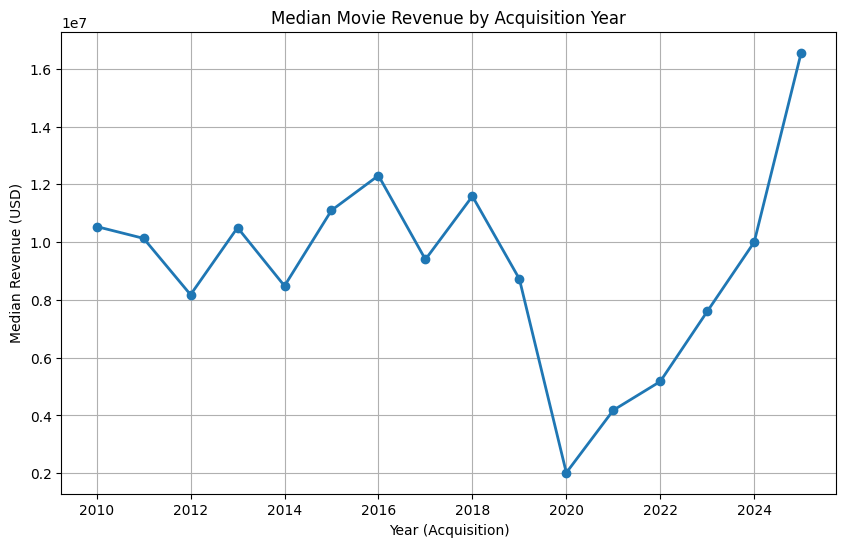

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(
    yearly_revenue_stats["year"],
    yearly_revenue_stats["median_revenue"],
    marker="o",
    linewidth=2
)

plt.title("Median Movie Revenue by Acquisition Year")
plt.xlabel("Year (Acquisition)")
plt.ylabel("Median Revenue (USD)")
plt.grid(True)

plt.show()

In [14]:
# Compute median revenue and number of movies per month
monthly_revenue_stats = (
    movies_df.loc[movies_df["revenue"] > 0]
    .groupby("year_month")
    .agg(
        median_revenue=("revenue", "median"),
        n_movies=("revenue", "size")
    )
    .reset_index()
)

# Filter months with sufficient samples
monthly_revenue_stats = monthly_revenue_stats.loc[
    monthly_revenue_stats["n_movies"] >= 10
]

monthly_revenue_stats.head()

,year_month,median_revenue,n_movies
0,2010-01,10179615.5,28
1,2010-02,11000000.0,29
2,2010-03,12010250.5,40
3,2010-04,9988110.0,24
4,2010-05,8428636.0,25


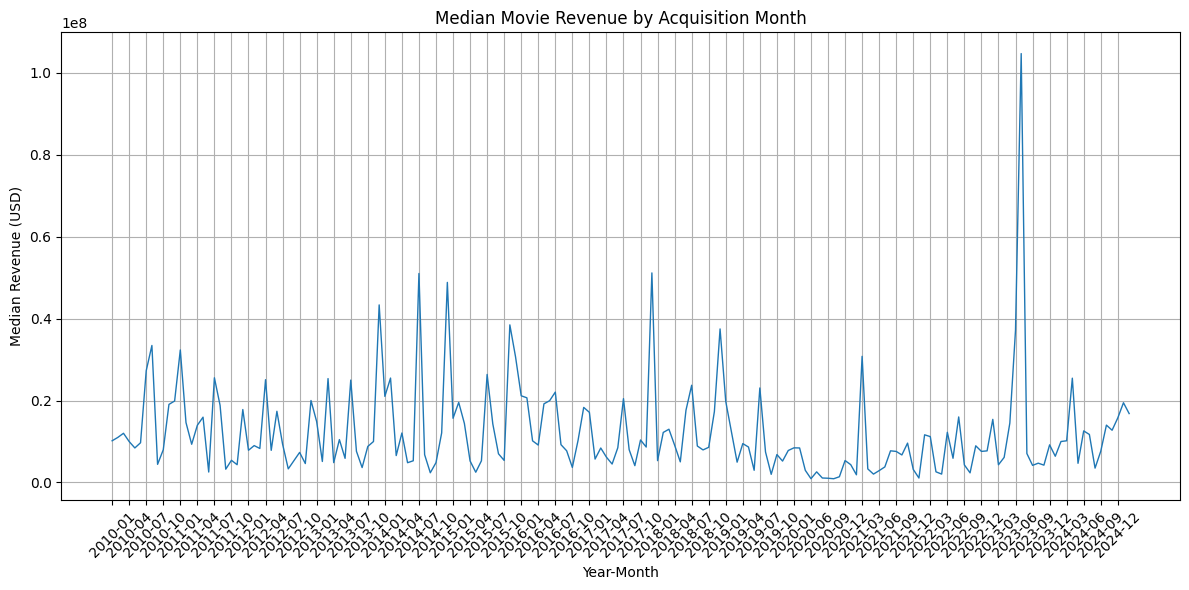

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot line
plt.plot(
    monthly_revenue_stats["year_month"].astype(str),
    monthly_revenue_stats["median_revenue"],
    linewidth=1
)

plt.title("Median Movie Revenue by Acquisition Month")
plt.xlabel("Year-Month")
plt.ylabel("Median Revenue (USD)")
plt.grid(True)

# Show x-axis labels every 3 months (quarterly)
tick_step = 3
plt.xticks(
    ticks=range(0, len(monthly_revenue_stats), tick_step),
    labels=monthly_revenue_stats["year_month"].astype(str).iloc[::tick_step],
    rotation=45
)

plt.tight_layout()
plt.show()

In [17]:
# Compute median movie revenue by acquisition quarter
quarterly_revenue_stats = (
    movies_df.loc[movies_df["revenue"] > 0]
    .groupby(movies_df["date_added"].dt.to_period("Q"))
    .agg(
        median_revenue=("revenue", "median"),
        n_movies=("revenue", "size")
    )
    .reset_index()
)

# Convert Period to string for plotting
quarterly_revenue_stats["year_quarter"] = quarterly_revenue_stats["date_added"].astype(str)

# Keep quarters with sufficient samples
quarterly_revenue_stats = quarterly_revenue_stats.loc[
    quarterly_revenue_stats["n_movies"] >= 10
]

quarterly_revenue_stats.head()

,date_added,median_revenue,n_movies,year_quarter
0,2010Q1,12000000.0,97,2010Q1
1,2010Q2,9126154.0,84,2010Q2
2,2010Q3,12925640.0,102,2010Q3
3,2010Q4,11463490.0,110,2010Q4
4,2011Q1,14624826.0,81,2011Q1


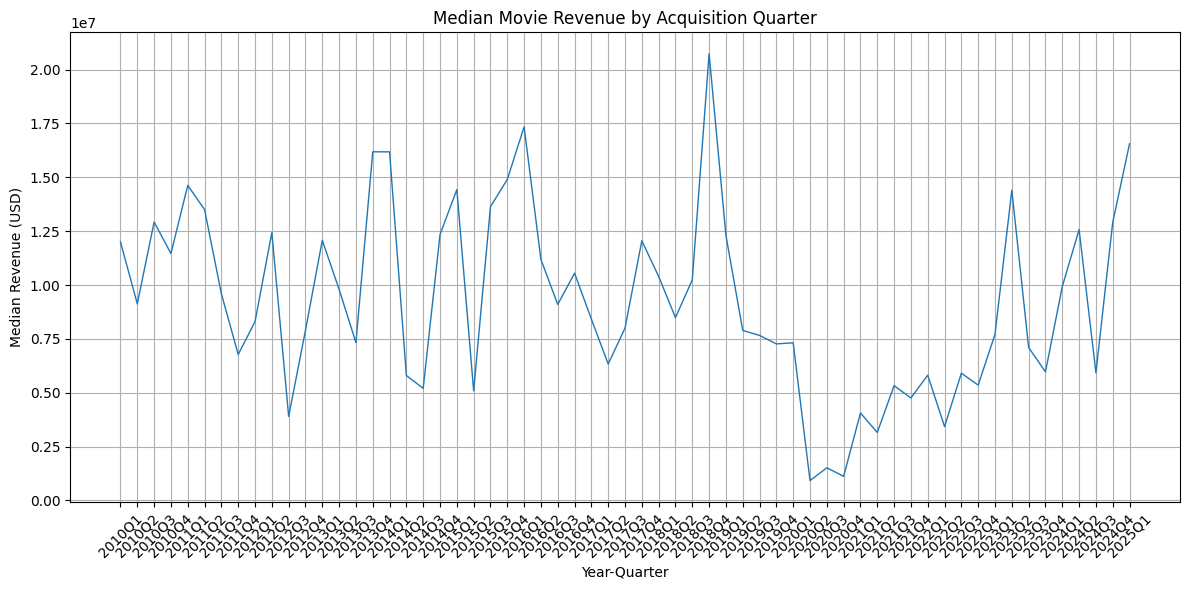

In [18]:
# Aggregate to quarterly median revenue (optional)
quarterly_revenue_stats = (
    movies_df.loc[movies_df["revenue"] > 0]
    .groupby(movies_df["date_added"].dt.to_period("Q"))["revenue"]
    .median()
    .reset_index(name="median_revenue")
)

quarterly_revenue_stats["year_quarter"] = quarterly_revenue_stats["date_added"].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(quarterly_revenue_stats["year_quarter"], quarterly_revenue_stats["median_revenue"], linewidth=1)

plt.title("Median Movie Revenue by Acquisition Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Median Revenue (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Budget vs Revenue

In [23]:
# Compute yearly median budget and revenue (movies only, positive values)
yearly_financial_stats = (
    movies_df
    .loc[(movies_df["budget"] > 0) & (movies_df["revenue"] > 0)]
    .groupby("year")
    .agg(
        median_budget=("budget", "median"),
        median_revenue=("revenue", "median"),
        n_movies=("budget", "size")
    )
    .reset_index()
)

yearly_financial_stats.head()

,year,median_budget,median_revenue,n_movies
0,2010,15000000.0,20078723.5,288
1,2011,17000000.0,27000000.0,293
2,2012,14000000.0,24908246.0,264
3,2013,15000000.0,24333328.0,286
4,2014,14000000.0,28595105.0,271


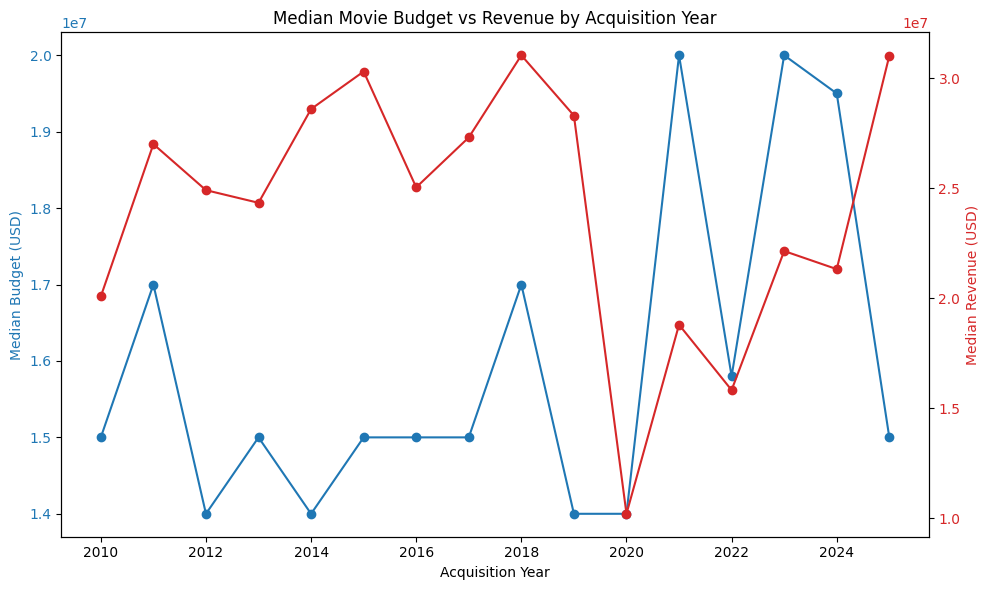

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot median budget
ax1.plot(
    yearly_financial_stats["year"],
    yearly_financial_stats["median_budget"],
    color="tab:blue",
    marker="o",
    label="Median Budget"
)
ax1.set_xlabel("Acquisition Year")
ax1.set_ylabel("Median Budget (USD)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(
    yearly_financial_stats["year"],
    yearly_financial_stats["median_revenue"],
    color="tab:red",
    marker="o",
    label="Median Revenue"
)
ax2.set_ylabel("Median Revenue (USD)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and layout
plt.title("Median Movie Budget vs Revenue by Acquisition Year")
fig.tight_layout()
plt.show()

Netflix’s acquisition strategy has evolved toward selectively acquiring higher-budget films with stronger revenue potential, rather than uniformly increasing production costs over time.

In [25]:
import matplotlib.pyplot as plt

# 1) Build quarterly stats (median + sample size) for budget and revenue
quarterly_stats = (
    movies_df
    .assign(year_quarter=movies_df["date_added"].dt.to_period("Q"))
    .groupby("year_quarter")
    .agg(
        median_budget=("budget", lambda x: x.loc[x > 0].median()),
        n_budget=("budget", lambda x: (x > 0).sum()),
        median_revenue=("revenue", lambda x: x.loc[x > 0].median()),
        n_revenue=("revenue", lambda x: (x > 0).sum())
    )
    .reset_index()
)

# 2) Keep quarters with enough samples (adjust threshold if needed)
min_n = 10
quarterly_stats = quarterly_stats[
    (quarterly_stats["n_budget"] >= min_n) & (quarterly_stats["n_revenue"] >= min_n)
].copy()

# 3) Convert quarter label to string for plotting
quarterly_stats["year_quarter"] = quarterly_stats["year_quarter"].astype(str)

quarterly_stats.head()

,year_quarter,median_budget,n_budget,median_revenue,n_revenue
0,2010Q1,13000000.0,94,12000000.0,97
1,2010Q2,8000000.0,91,9126154.0,84
2,2010Q3,10000000.0,106,12925640.0,102
3,2010Q4,9250000.0,112,11463490.0,110
4,2011Q1,10600000.0,93,14624826.0,81


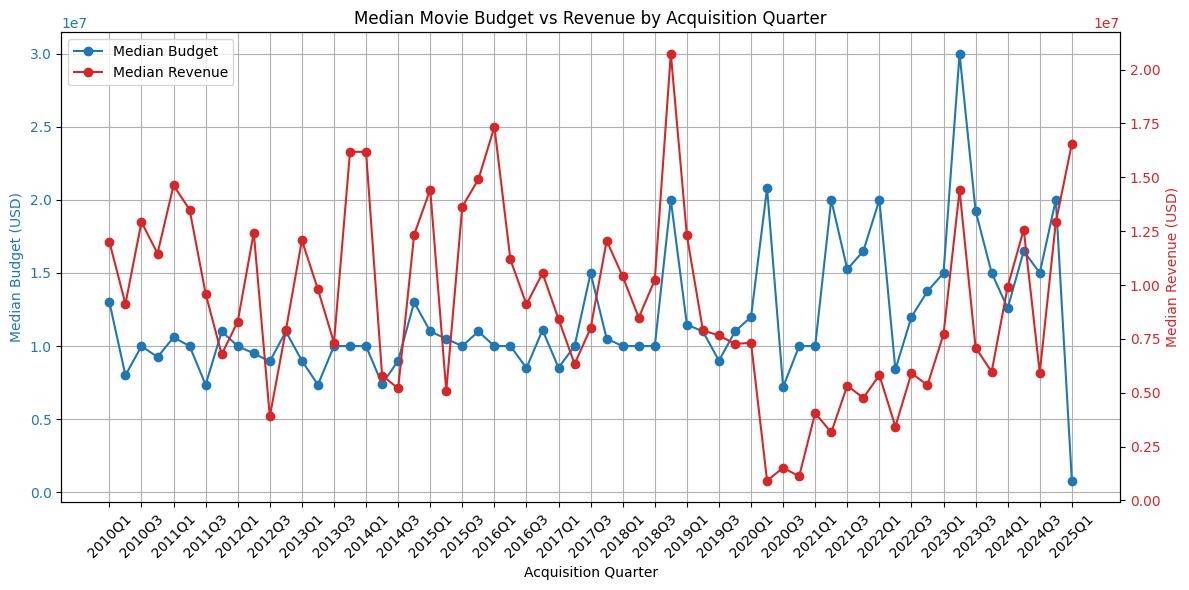

In [26]:
import matplotlib.pyplot as plt

x = quarterly_stats["year_quarter"]
budget = quarterly_stats["median_budget"]
revenue = quarterly_stats["median_revenue"]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Budget line (left axis)
ax1.plot(
    x,
    budget,
    color="tab:blue",
    marker="o",
    label="Median Budget"
)
ax1.set_xlabel("Acquisition Quarter")
ax1.set_ylabel("Median Budget (USD)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True)

# Revenue line (right axis)
ax2 = ax1.twinx()
ax2.plot(
    x,
    revenue,
    color="tab:red",
    marker="o",
    label="Median Revenue"
)
ax2.set_ylabel("Median Revenue (USD)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# X-axis label control (every 2 quarters)
step = 2
ax1.set_xticks(range(0, len(x), step))
ax1.set_xticklabels(x[::step], rotation=45)

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Median Movie Budget vs Revenue by Acquisition Quarter")
plt.tight_layout()
plt.show()


This quarterly comparison reveals that Netflix’s movie acquisition strategy has evolved in a more granular and dynamic manner than is visible in annual aggregates. While median budgets show stepwise increases over time, median revenues fluctuate more sharply across quarters, indicating varying risk–return profiles in Netflix’s acquisition choices. Notably, several periods exhibit rising acquisition budgets without proportional increases in median revenue, suggesting a strategic shift toward higher-budget or franchise-oriented content where immediate financial return may not be the primary objective. Overall, the quarterly view highlights Netflix’s increasing willingness to absorb short-term revenue volatility in exchange for long-term catalog value and brand positioning.

Annual aggregation smooths short-term variation and provides a high-level overview of Netflix’s acquisition scale. However, it obscures timing-related strategic decisions, such as sudden increases in budget intensity or periods of heightened revenue uncertainty. In contrast, quarterly analysis captures these inflection points more effectively, allowing observation of when Netflix accelerates spending, tolerates revenue risk, or adjusts its acquisition profile in response to market conditions. Therefore, the quarterly perspective is more suitable for analyzing strategic behavior rather than descriptive trends.

## Analysis (Q3)
The quarterly analysis of movie acquisition budgets and revenues indicates that Netflix’s acquisition strategy has evolved in a more granular and dynamic manner than is apparent from annual aggregates. While median acquisition budgets exhibit a stepwise upward trend over time, median revenues fluctuate more sharply across quarters, reflecting varying risk–return profiles in Netflix’s content selection. Several periods show increases in acquisition budgets without corresponding growth in median revenue, suggesting a strategic shift toward higher-budget or franchise-oriented content where immediate financial performance may not be the primary objective. Compared to annual aggregation, the quarterly view captures these inflection points more effectively, highlighting Netflix’s increasing willingness to tolerate short-term revenue volatility in exchange for long-term catalog value, audience engagement, and brand positioning.

### Limitation

This analysis relies on budget and revenue data from acquired movies, which may be incomplete or unevenly reported across years. Additionally, revenue reflects total box office performance rather than Netflix-specific returns, limiting direct attribution to acquisition success. Monthly and quarterly aggregations may also be influenced by small sample sizes in certain periods, leading to short-term volatility. As a result, the findings should be interpreted as indicators of strategic acquisition scale and risk tolerance rather than precise measures of financial performance.